USE CIFAR10 DATASET!
DEMO DATASET IS SMALL!

In [1]:
import os,os.path
from PIL import Image
import numpy as np
from sklearn.datasets import load_digits
from sklearn.metrics import confusion_matrix
import itertools 
from sklearn import neural_network
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import random

nume_folder_imagini = "airplane"
nume_folder_imagini_sepia = "airplane_sepia"

In [2]:
imagini=[]
imagini_sepia=[]
path_normal = f"images/{nume_folder_imagini}"
path_sepia = f"images/{nume_folder_imagini_sepia}"
valid_images = [".webp",".jpg",".png"]

for f in os.scandir(path_normal):
    img = Image.open(os.path.join(f))
    img = np.asarray(img)
    processed = []
    for i in img:
        processed += list(i)
    imagini.append(np.ravel(processed)/255.0)

for f in os.scandir(path_sepia):
    img = Image.open(os.path.join(f))
    img = np.asarray(img)
    processed = []
    for i in img:
        processed += list(i)
    imagini_sepia.append(np.ravel(processed)/255.0)


all_images = []
all_images_outputs=[]

for e in imagini:
    all_images.append(e)
    all_images_outputs.append(0)
for e in imagini_sepia:
    all_images.append(e)
    all_images_outputs.append(1)

#all_images (img)
#all_images_outputs (T/F)

def impartire(inputs,outputs):
    #inputs = [[X1,X2],[X1,X2],...]
    #outputs = [Y,Y,...]
    #outputuri = same ^
    #np.random.seed(5)
    indexes = [i for i in range(len(inputs))]

    trainSample = np.random.choice(indexes, int(0.8 * len(inputs)), replace = False)
    testSample = [i for i in indexes if not i in trainSample]
    random.shuffle(testSample)
    
    trainInputs = [inputs[i] for i in trainSample]
    trainOutputs = [outputs[i] for i in trainSample]
    testInputs = [inputs[i] for i in testSample]
    testOutputs = [outputs[i] for i in testSample]

    return trainInputs,trainOutputs,testInputs,testOutputs

trainInputs,trainOutputs,testInputs,testOutputs = impartire(all_images,all_images_outputs)

trainInputs = np.array(trainInputs)
trainOutputs = np.array(trainOutputs)
testInputs = np.array(testInputs)
testOutputs = np.array(testOutputs)

In [3]:
def plotConfusionMatrix(cm, classNames, title):
    classes = classNames
    plt.figure()
    plt.imshow(cm, interpolation = 'nearest', cmap = 'Blues')
    plt.title('Confusion Matrix ' + title)
    plt.colorbar()
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)

    text_format = 'd'
    thresh = cm.max() / 2.
    for row, column in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(column, row, format(cm[row, column], text_format),
                horizontalalignment = 'center',
                color = 'white' if cm[row, column] > thresh else 'black')

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

    plt.show()

def evalMultiClass(realLabels, computedLabels, labelNames):
    from sklearn.metrics import confusion_matrix

    confMatrix = confusion_matrix(realLabels, computedLabels)
    acc = sum([confMatrix[i][i] for i in range(len(labelNames))]) / len(realLabels)
    precision = {}
    recall = {}
    for i in range(len(labelNames)):
        precision[labelNames[i]] = confMatrix[i][i] / sum([confMatrix[j][i] for j in range(len(labelNames))])
        recall[labelNames[i]] = confMatrix[i][i] / sum([confMatrix[i][j] for j in range(len(labelNames))])
    return acc, precision, recall, confMatrix

In [4]:
trainInputs

array([[0.40784314, 0.54117647, 0.70980392, ..., 0.8745098 , 0.8745098 ,
        0.8745098 ],
       [0.32941176, 0.48235294, 0.75686275, ..., 0.74117647, 0.80392157,
        0.9254902 ],
       [1.        , 1.        , 0.81960784, ..., 0.30980392, 0.2745098 ,
        0.21568627],
       ...,
       [0.79215686, 0.8       , 0.78039216, ..., 0.94117647, 0.93333333,
        0.95294118],
       [0.85882353, 0.76470588, 0.59607843, ..., 0.90588235, 0.80784314,
        0.62745098],
       [0.44313725, 0.38431373, 0.27058824, ..., 0.68627451, 0.66666667,
        0.69019608]])

In [5]:
trainOutputs

array([0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0])

In [6]:
classifier = neural_network.MLPClassifier(hidden_layer_sizes=(32,32), activation='relu', max_iter=1000, solver="sgd")
classifier.fit(trainInputs,trainOutputs)

y_computed = classifier.predict(testInputs)

acc, prec, recall, cm = evalMultiClass(testOutputs, y_computed, [1,0])
print("acc: ",acc)
print("prec: ",prec)
print("recall: ",recall)
print("cm: ",cm)

acc:  0.875
prec:  {1: 0.6666666666666666, 0: 1.0}
recall:  {1: 1.0, 0: 0.8333333333333334}
cm:  [[2 0]
 [1 5]]


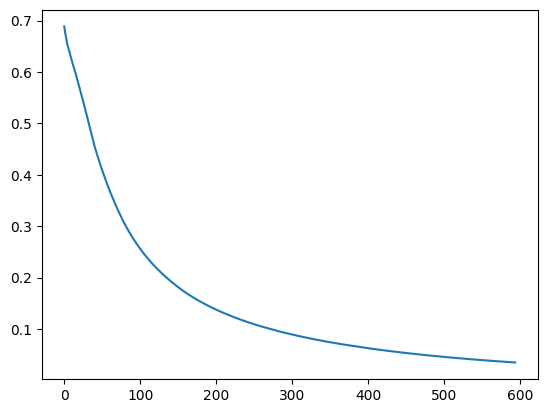

In [7]:
plt.plot(classifier.loss_curve_,label="Loss")
plt.show()

In [8]:
classifier2 = neural_network.MLPClassifier(hidden_layer_sizes=(16,16), activation='relu', max_iter=1000, solver="sgd")
classifier2.fit(trainInputs,trainOutputs)

y_computed2 = classifier2.predict(testInputs)

acc2, prec2, recall2, cm2 = evalMultiClass(testOutputs, y_computed2, [1,0])
print("acc: ",acc2)
print("prec: ",prec2)
print("recall: ",recall2)
print("cm: ",cm2)

acc:  1.0
prec:  {1: 1.0, 0: 1.0}
recall:  {1: 1.0, 0: 1.0}
cm:  [[2 0]
 [0 6]]


In [9]:
classifier3 = neural_network.MLPClassifier(hidden_layer_sizes=(32,16,32), activation='logistic', max_iter=1000, solver="adam")
classifier3.fit(trainInputs,trainOutputs)

y_computed3 = classifier3.predict(testInputs)
acc3, prec3, recall3, cm3 = evalMultiClass(testOutputs, y_computed3, [1,0])
print("acc: ",acc3)
print("prec: ",prec3)
print("recall: ",recall3)
print("cm: ",cm3)

acc:  0.875
prec:  {1: 1.0, 0: 0.8571428571428571}
recall:  {1: 0.5, 0: 1.0}
cm:  [[1 1]
 [0 6]]


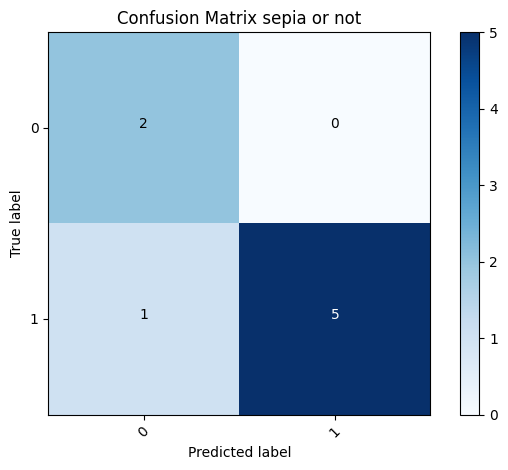

In [10]:
plotConfusionMatrix(cm, [0,1], "sepia or not")

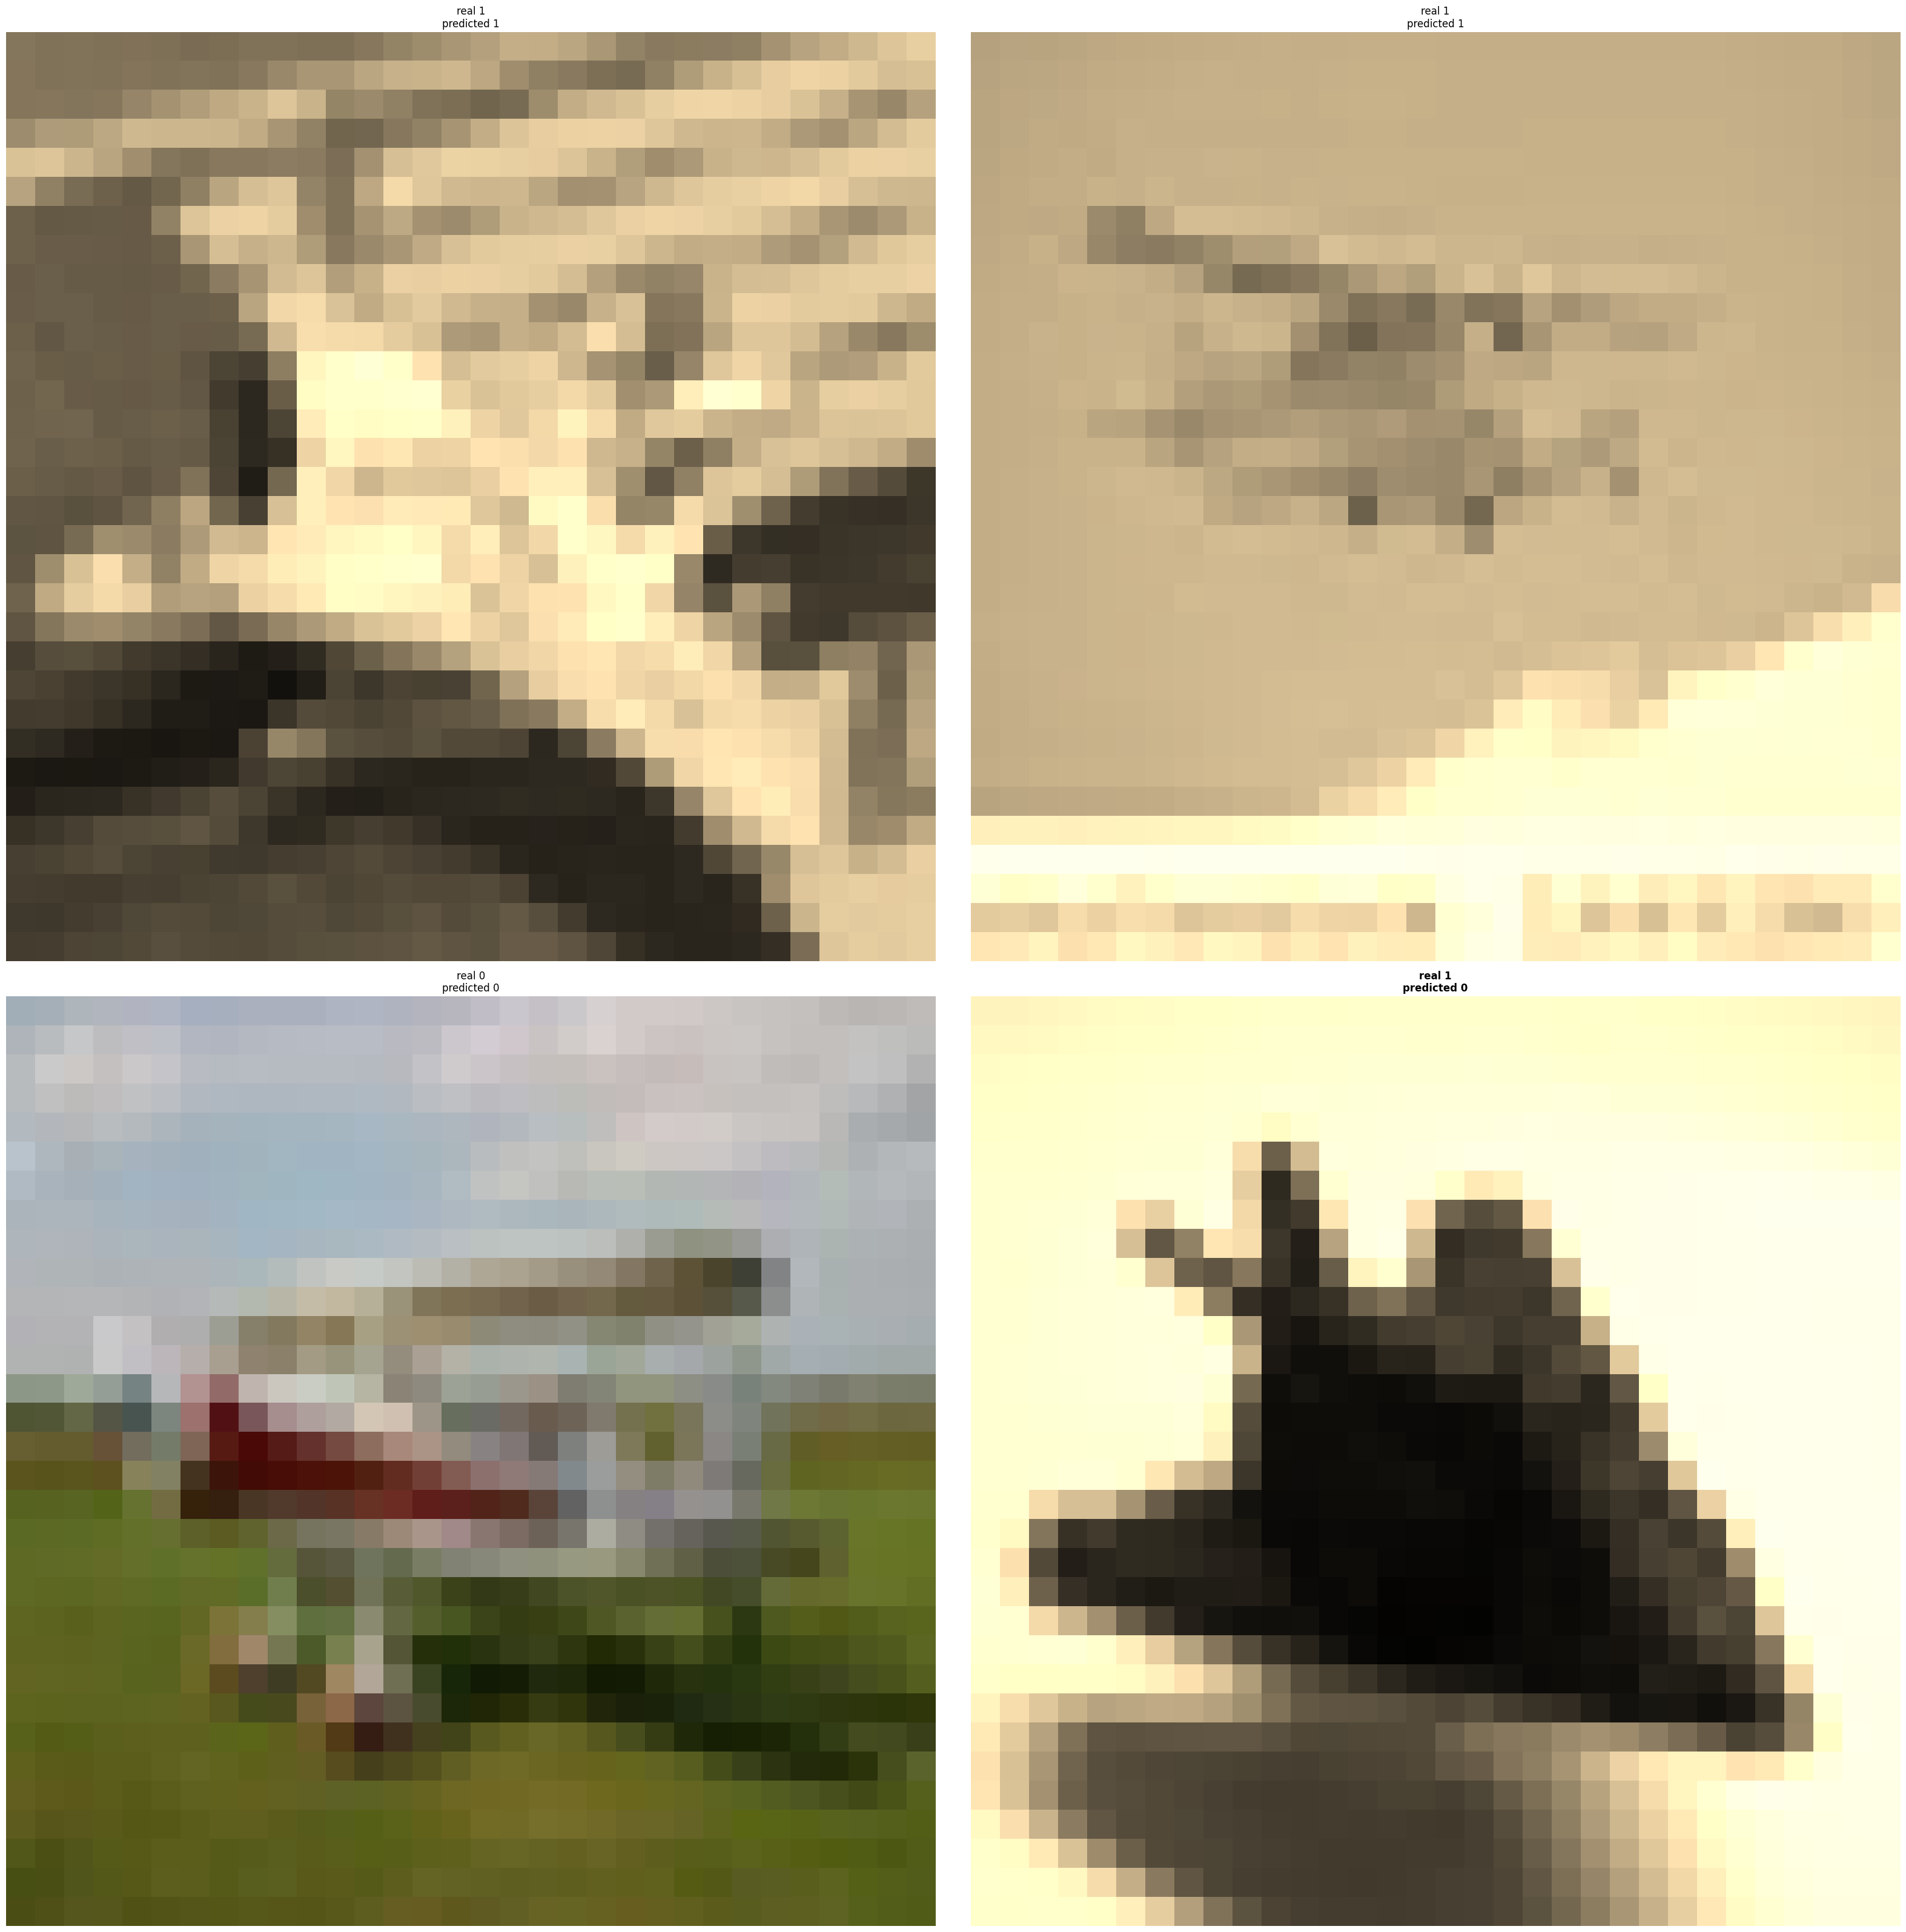

In [14]:
n = 2
m = 2
#n = 10
#m = 10
#For bigger dataset, not just demo ^
fig, axes = plt.subplots(n, m, figsize = (32, 32))
fig.tight_layout() 
for i in range(0, n):
    for j in range(0, m):
        axes[i][j].imshow(np.reshape(testInputs[m * i + j],(32,32,3)))
        if (testOutputs[m * i + j] == y_computed[m * i + j]):
            font = 'normal'
        else:
            font = 'bold'
        axes[i][j].set_title('real ' + str(testOutputs[m * i + j]) + '\npredicted ' + str(y_computed[m * i + j]), fontweight=font)
        axes[i][j].set_axis_off()
        
plt.show()

# ann from scratch

In [15]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [16]:
def init_params():
    W1 = np.random.randn(16, 3072) * 0.05
    b1 = np.random.randn(16, 1) * 0.05
    W2 = np.random.randn(2, 16) * 0.05
    b2 = np.random.randn(2, 1) * 0.05
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    Z -= np.max(Z, axis=0)  # Subtract max value for numerical stability
    A = np.exp(Z) / np.sum(np.exp(Z), axis=0)
    return A
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2


In [17]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    #print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [18]:
data = np.column_stack((trainInputs,trainOutputs))
m, n = data.shape
#data

In [21]:
m

32

In [22]:
n

3073

In [23]:
data

array([[0.40784314, 0.54117647, 0.70980392, ..., 0.8745098 , 0.8745098 ,
        0.        ],
       [0.32941176, 0.48235294, 0.75686275, ..., 0.80392157, 0.9254902 ,
        0.        ],
       [1.        , 1.        , 0.81960784, ..., 0.2745098 , 0.21568627,
        1.        ],
       ...,
       [0.79215686, 0.8       , 0.78039216, ..., 0.93333333, 0.95294118,
        0.        ],
       [0.85882353, 0.76470588, 0.59607843, ..., 0.80784314, 0.62745098,
        1.        ],
       [0.44313725, 0.38431373, 0.27058824, ..., 0.66666667, 0.69019608,
        0.        ]])

In [25]:
data_dev = data[0:4].T
#data_dev = data[0:500].T
Y_dev = data_dev[-1]
Y_dev = Y_dev.astype(int)
X_dev = data_dev[0:n-1]

data_train = data[4:m].T
#data_train = data[500:m].T
Y_train = data_train[-1]
Y_train = Y_train.astype(int)
X_train = data_train[0:n-1]

#Use commented when on bigger dataset

In [26]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.1, 1001)

Iteration:  0
0.4642857142857143
Iteration:  10
0.75
Iteration:  20
0.4642857142857143
Iteration:  30
0.4642857142857143
Iteration:  40
0.4642857142857143
Iteration:  50
0.5714285714285714
Iteration:  60
0.4642857142857143
Iteration:  70
0.7857142857142857
Iteration:  80
0.4642857142857143
Iteration:  90
0.4642857142857143
Iteration:  100
0.4642857142857143
Iteration:  110
0.4642857142857143
Iteration:  120
0.4642857142857143
Iteration:  130
0.4642857142857143
Iteration:  140
0.4642857142857143
Iteration:  150
0.4642857142857143
Iteration:  160
0.4642857142857143
Iteration:  170
0.5
Iteration:  180
0.75
Iteration:  190
0.4642857142857143
Iteration:  200
0.4642857142857143
Iteration:  210
0.4642857142857143
Iteration:  220
0.4642857142857143
Iteration:  230
0.4642857142857143
Iteration:  240
0.4642857142857143
Iteration:  250
0.4642857142857143
Iteration:  260
0.4642857142857143
Iteration:  270
0.4642857142857143
Iteration:  280
0.4642857142857143
Iteration:  290
0.4642857142857143
Iter

In [28]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

0.25

# cnn

In [29]:
import keras

In [30]:
reprocessed_train_in = np.reshape(trainInputs[0],(32,32,3))
reprocessed_train_in = [np.reshape(trainInputs[i],(32,32,3)) for i in range(len(trainInputs))]
reprocessed_train_in = np.array(reprocessed_train_in)

In [31]:
reprocessed_train_out = keras.utils.to_categorical(trainOutputs,num_classes=2)

In [32]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np 

In [33]:
model = Sequential()
#model.add(Convolution2D(32,3,data_format='channels_last',activation='relu',input_shape=(32,32,3)))
#model.add(Convolution2D(32,3,data_format='channels_last',activation='relu',))
model.add(Convolution2D(32,3,data_format='channels_last',activation='relu',input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(100))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer = 'adadelta', metrics = ['accuracy'])

c:\Users\RoscaMitrut\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [34]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 7200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       720,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           202 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 2)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 721,198 (2.75 MB)

 Trainable params: 721,198 (2.75 MB)

 Non-trainable params: 0 (0.00 B)

In [35]:
history = model.fit(reprocessed_train_in,reprocessed_train_out,epochs=20)

Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.4688 - loss: 0.7320
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.5312 - loss: 0.6873
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.4062 - loss: 0.7767
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.5938 - loss: 0.7049
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.4688 - loss: 0.7375
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.6250 - loss: 0.7331
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.4688 - loss: 0.7547
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.4688 - loss: 0.7628
Epoch 9/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.6250 - loss: 0.6402
Epoch 10/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.5312 - loss: 0.7202
Epoch 11/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.3750 - loss: 0.7347
Epoch 12/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.6250 - loss: 0.6920
Epo

Text(0, 0.5, 'Loss & acc')

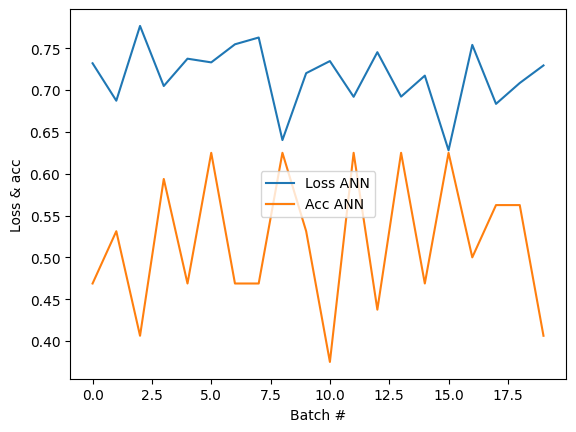

In [36]:
loss2, = plt.plot(history.history['loss'], label = 'loss CNN')
acc2, = plt.plot(history.history['accuracy'], label = 'acc CNN')
plt.legend([loss2, (loss2, acc2)], ['Loss ANN', 'Acc ANN', 'Loss CNN', 'Acc CNN'])
plt.xlabel('Batch #')
plt.ylabel('Loss & acc')

In [37]:
#TValues are low due to the size of the demo dataset. To improve, use cifar10 dataset